In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityDF = pd.read_csv("Resources/city_data.csv")
rideDF = pd.read_csv("Resources/ride_data.csv")

# Read the City and Ride Data
print(cityDF.head())
print(rideDF.head())

# Combine the data into a single dataset
cityride = pd.merge(cityDF, rideDF, on = 'city', how = 'outer')

# Display the data table for preview
cityride = cityride[["city", "date", "fare", "ride_id", "driver_count", "type"]]
cityride.head()

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

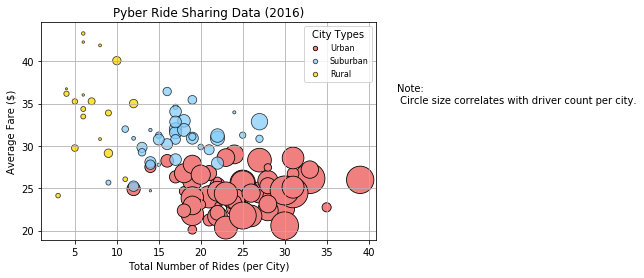

In [68]:
### Obtain the x and y coordinates for each of the three city types
# Filtering the original merged dataframe based on type, then grouping by city

# Urban groupby
urbanCityride = cityride.loc[cityride['type'] == 'Urban', :]
urbanCityrideGrpBy = urbanCityride.groupby(['city'])

# Urban calculations
urbanFare = urbanCityrideGrpBy["fare"].mean()
urbanRide = urbanCityrideGrpBy["ride_id"].count()
urbanDriver = urbanCityrideGrpBy["driver_count"].sum()

#Suburban groupby
suburbanCityride = cityride.loc[cityride['type'] == 'Suburban', :]
suburbanCityrideGrpBy = suburbanCityride.groupby(['city'])

# Suburban calculations
suburbanFare = suburbanCityrideGrpBy["fare"].mean()
suburbanRide = suburbanCityrideGrpBy["ride_id"].count()
suburbanDriver = suburbanCityrideGrpBy["driver_count"].sum()

# Rural groupby
ruralCityride = cityride.loc[cityride['type'] == 'Rural', :]
ruralCityrideGrpBy = ruralCityride.groupby(['city'])

# Rural calculations
ruralFare = ruralCityrideGrpBy["fare"].mean()
ruralRide = ruralCityrideGrpBy["ride_id"].count()
ruralDriver = ruralCityrideGrpBy["driver_count"].sum()


# Build the scatter plots for each type
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

Urban = plt.scatter(urbanRide, urbanFare, marker="o", facecolors="lightcoral", edgecolors="black",
            s=urbanDriver*0.4, alpha=1, label = 'Urban', linewidths = 0.8)
Suburban = plt.scatter(suburbanRide, suburbanFare, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=suburbanDriver*0.4, alpha=0.75, label = 'Suburban', linewidths = 0.8)
Rural = plt.scatter(ruralRide, ruralFare, marker="o", facecolors="gold", edgecolors="black",
            s=ruralDriver, alpha=0.75, label = 'Rural', linewidths = 0.8)

# Create a legend
legend = plt.legend(handles=[Urban, Suburban, Rural], loc="best", title = 'City Types', fontsize = 8)

for legend_handle in legend.legendHandles:
    legend_handle._sizes = [20]
    
# Incorporate a text label regarding circle size
textstr1 = "Note:\n Circle size correlates with driver count per city."
plt.text(0.95, 0.6, textstr1 , fontsize=10, transform=plt.gcf().transFigure)


# Save Figure
# plt.Savefig('Relationship_between_Rides_Fare_Driverscnt_CityType.png')
plt.show()

## Total Fares by City Type

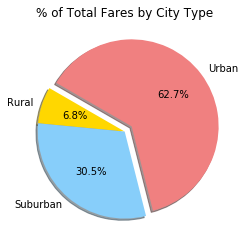

In [36]:
# groupby city
cityTypeGrpBy = cityride.groupby(["type"])

# Calculate Type Percents
ttlFares = cityride["fare"].sum()
prcntTtlFares = cityTypeGrpBy["fare"].sum() / ttlFares * 100


# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)


# titling the pie
plt.title("% of Total Fares by City Type")


# Build Pie Chart
plt.pie(prcntTtlFares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("FaresByCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

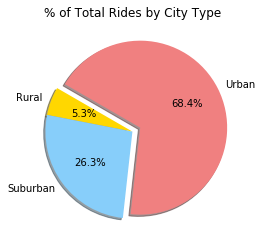

In [37]:
### Calculate Ride Percents
ttlRides = cityride["ride_id"].count()
prcntTtlRides = cityTypeGrpBy["ride_id"].count() / ttlRides * 100

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# titling the pie
plt.title("% of Total Rides by City Type")

# Build Pie Chart
plt.pie(prcntTtlRides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("RidesByCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

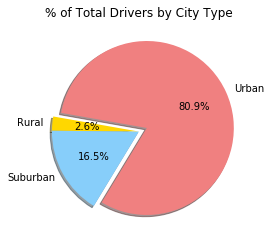

In [38]:
### Calculate Driver Percents

# groupby city from the original city dataframe
cityTypeDFGrpBy = cityDF.groupby(["type"])

ttlDrivers = cityDF["driver_count"].sum()
prcntTtlDrivers = cityTypeDFGrpBy["driver_count"].sum() / ttlDrivers * 100

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# titling the pie
plt.title("% of Total Drivers by City Type")

# Build Pie Chart
plt.pie(prcntTtlDrivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure
plt.savefig("DriverByCityType.png")

# Show Figure
plt.show()